<a href="https://colab.research.google.com/github/costagean/Redes_Neurais/blob/main/PROJETO%20FINAL%20DE%20REDES%20PARTE%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Bibliotecas necessárias para o carregamento das imagens a serem tratadas
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from sklearn.model_selection import train_test_split


In [55]:
# Buscando pasta de dados: banco de imagens sugeridos para o problema
!git clone https://github.com/costagean/Redes_Neurais/
%cd Redes_Neurais


Cloning into 'Redes_Neurais'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 78 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (78/78), done.
/content/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais


In [56]:
# carregando o banco de imagens selecionado para o tratamento do problema
Arq = ['group1.car.zip','group2.car.zip','group3.car.zip','group4.car.zip','group6.car.zip','group7.car.zip','group9.car.zip']
img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [57]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [58]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [59]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [60]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 150
num_range = DATASET_SIZE

In [61]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [62]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_train.append(y[II])

In [63]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(y[II])

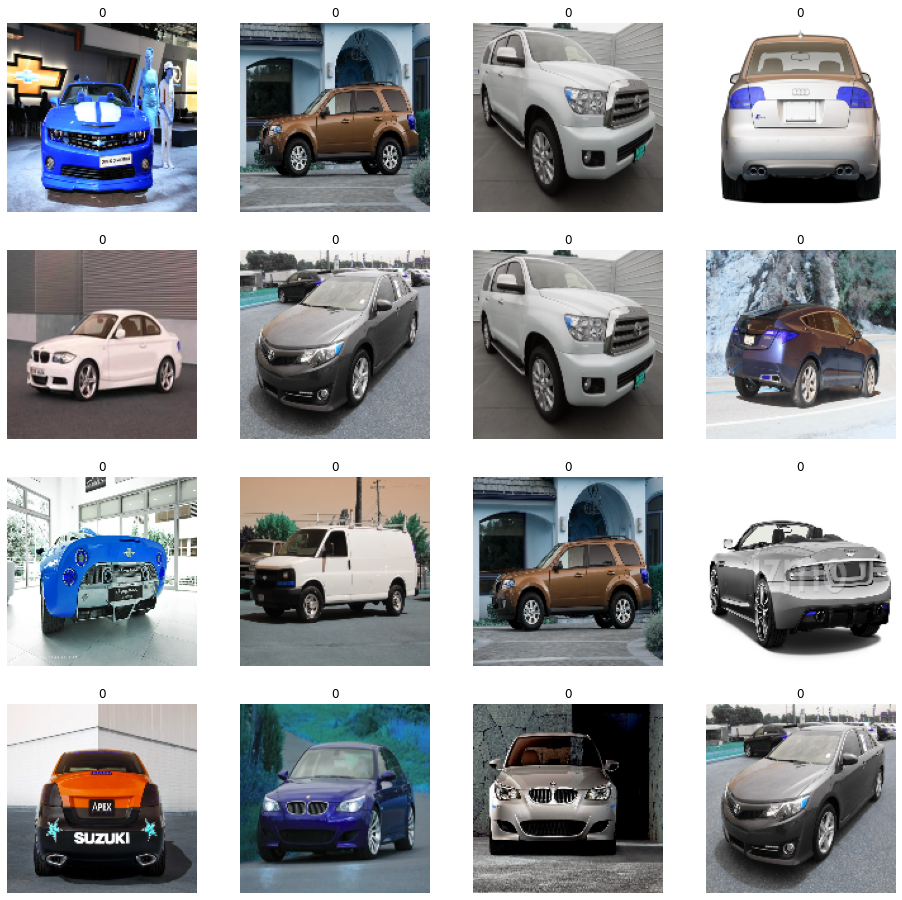

In [64]:
# Visualizando imagens de treino
num,cols,dim = np.array(X_train[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  plt.imshow(X_train[kk])
  plt.title(Y_train[kk])
  plt.axis("off")

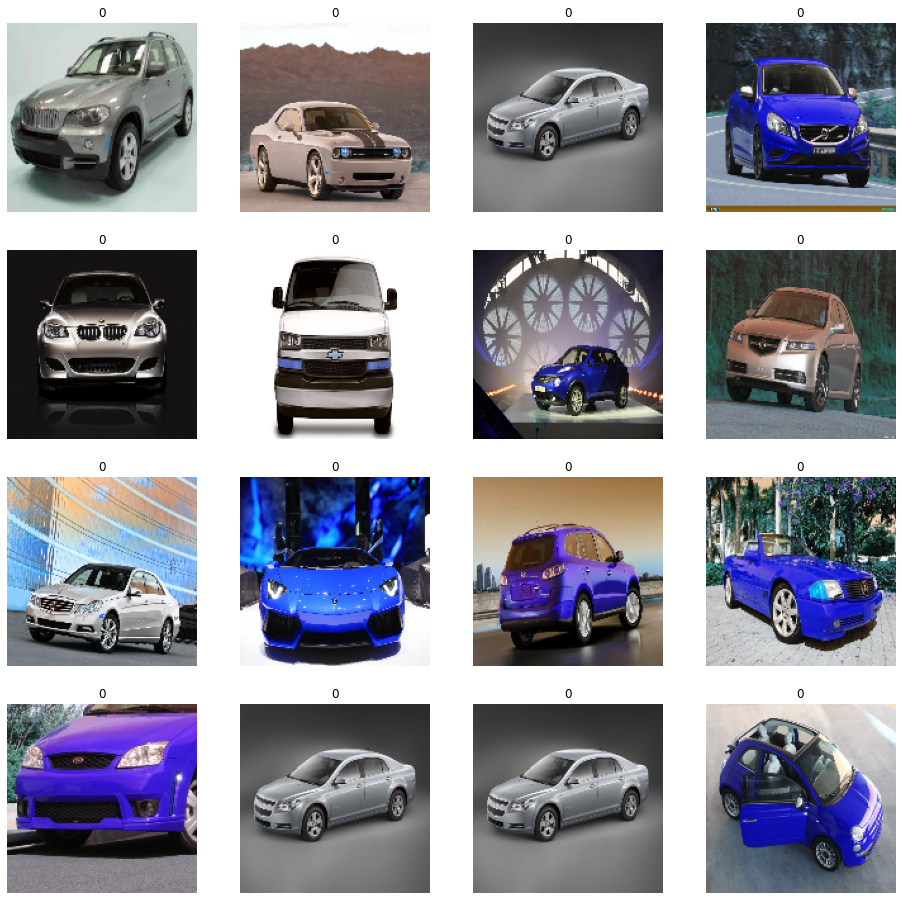

In [65]:
# Visualização de Imagens de train_ds
num,cols,dim = np.array(X_test[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  plt.imshow(X_test[kk])
  plt.title(Y_test[kk])
  plt.axis("off")